
# Heart Disease Prediction Application
# Datawarehouse and DataMining Project

**Importing the dependancies**

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import plot_confusion_matrix
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

**Data Collection and Processing**

In [ ]:
dataFrame = pd.read_csv('/content/heart.csv')
dataFrame.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataFrame.shape

(1025, 14)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
dataFrame.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#checking the distribution of Target variable
dataFrame['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1-->Presence of Heart Disease

0-->No Presence of Heart Disease

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04f8315d00>,
      dtype=object)

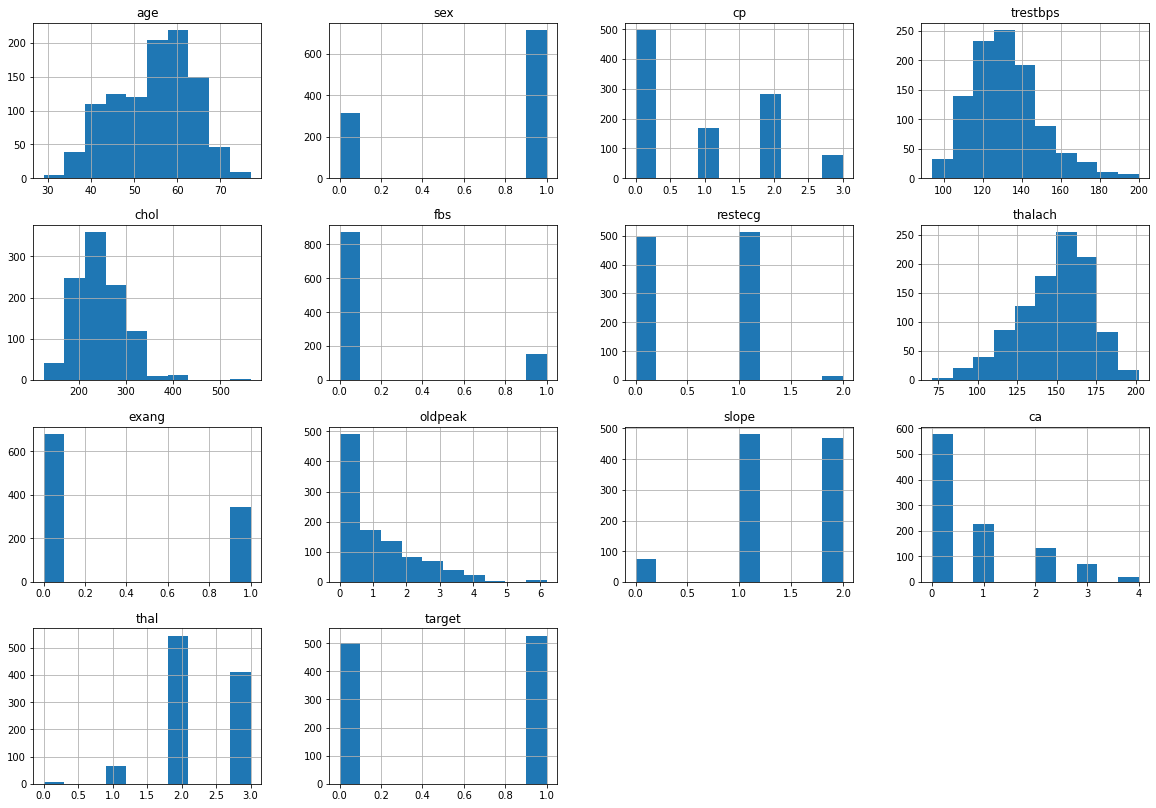

In [ ]:
rcParams['figure.figsize'] = 20, 14
dataFrame.hist()

**Splitting the Features and Target of the DataFrame.**

In [ ]:
X = dataFrame.drop(columns = 'target', axis = 1)
Y = dataFrame['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 2)

In [ ]:
print(X_train.shape, X_test.shape)

(717, 13) (308, 13)


In [ ]:
print(y_train.shape, y_test.shape)

(717,) (308,)


# **Model training**

*Logistic Regression**

In [ ]:
LRmodel = LogisticRegression()

In [ ]:
LRmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Model Evaluation

#Accuracy, Precision, F1-score, Recall, RocAuc on training Data

X_train_prediction = LRmodel.predict(X_train)

training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_precision = precision_score(X_train_prediction, y_train)
training_data_f1 = f1_score(X_train_prediction, y_train)
training_data_recall = recall_score(X_train_prediction, y_train)
training_data_roc_auc = roc_auc_score(X_train_prediction, y_train)


print("Accuracy on Training Data(LR): ", training_data_accuracy)
print("Precision on Training Data(LR): ", training_data_precision)
print("F1-score on Training Data(LR): ", training_data_f1)
print("Recall on Training Data(LR): ", training_data_recall)
print("Roc_Auc Score on Training Data(LR): ", training_data_roc_auc)

Accuracy on Training Data(LR):  0.8647140864714087
Precision on Training Data(LR):  0.9157608695652174
F1-score on Training Data(LR):  0.8741893644617381
Recall on Training Data(LR):  0.8362282878411911
Roc_Auc Score on Training Data(LR):  0.8687510865957548


In [ ]:
#Accuracy, Precision, F1-score, Recall, RocAuc on Testing Data

X_test_prediction = LRmodel.predict(X_test)

testing_data_accuracy = accuracy_score(X_test_prediction, y_test)
testing_data_precision = precision_score(X_test_prediction, y_test)
testing_data_f1 = f1_score(X_test_prediction, y_test)
testing_data_recall = recall_score(X_test_prediction, y_test)
testing_data_roc_auc = roc_auc_score(X_test_prediction, y_test)

print("Accuracy on Testing Data(LR): ", testing_data_accuracy)
print("Precision on Testing Data(LR): ", testing_data_precision)
print("F1-score on Testing Data(LR): ", testing_data_f1)
print("Recall on Testing Data(LR): ", testing_data_recall)
print("Roc_Auc Score on Testing Data(LR): ", testing_data_roc_auc)

Accuracy on Testing Data(LR):  0.7922077922077922
Precision on Testing Data(LR):  0.8607594936708861
F1-score on Testing Data(LR):  0.8095238095238095
Recall on Testing Data(LR):  0.7640449438202247
Roc_Auc Score on Testing Data(LR):  0.7974070872947278


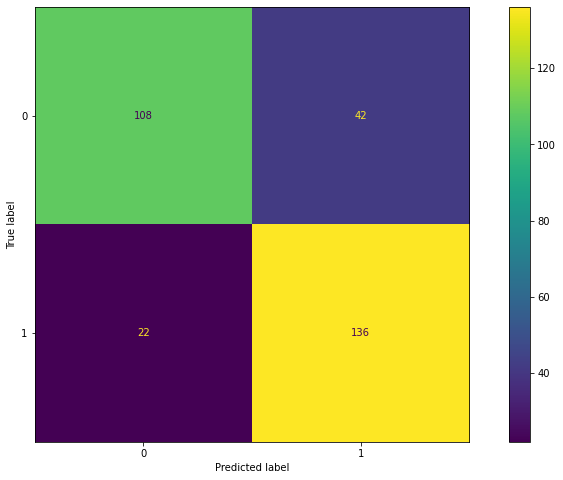

In [ ]:
rcParams['figure.figsize'] = 14, 8
plot_confusion_matrix(LRmodel, X_test, y_test)

**Support Vector Classifier**

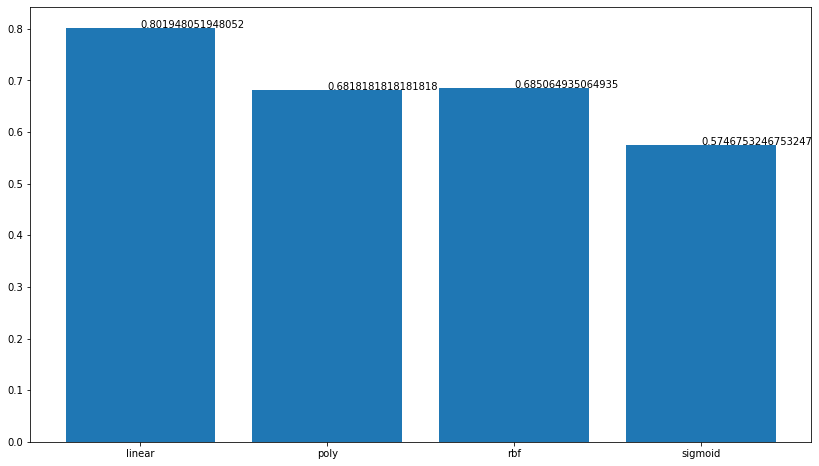

In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
  svc_classifier = SVC(kernel = kernels[i])
  svc_classifier.fit(X_train, y_train)
  svc_scores.append(svc_classifier.score(X_test, y_test))

plt.bar(kernels, svc_scores)
for i in range(len(kernels)):
  plt.text(i, svc_scores[i], svc_scores[i])

In [ ]:
svc_classifier = SVC(kernel = 'linear')
svc_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = svc_classifier.predict(X_train)

training_data_accuracyS = accuracy_score(X_train_prediction, y_train)
training_data_precisionS = precision_score(X_train_prediction, y_train)
training_data_f1S = f1_score(X_train_prediction, y_train)
training_data_recallS = recall_score(X_train_prediction, y_train)
training_data_roc_aucS = roc_auc_score(X_train_prediction, y_train)


print("Accuracy on Training Data(SVM): ", training_data_accuracyS)
print("Precision on Training Data(SVM): ", training_data_precisionS)
print("F1-score on Training Data(SVM): ", training_data_f1S)
print("Recall on Training Data(SVM): ", training_data_recallS)
print("Roc_Auc Score on Training Data(SVM): ", training_data_roc_aucS)

Accuracy on Training Data(SVM):  0.8702928870292888
Precision on Training Data(SVM):  0.9402173913043478
F1-score on Training Data(SVM):  0.8815286624203821
Recall on Training Data(SVM):  0.829736211031175
Roc_Auc Score on Training Data(SVM):  0.8782014388489208


In [ ]:
X_test_prediction = svc_classifier.predict(X_test)

testing_data_accuracyS = accuracy_score(X_test_prediction, y_test)
testing_data_precisionS = precision_score(X_test_prediction, y_test)
testing_data_f1S = f1_score(X_test_prediction, y_test)
testing_data_recallS = recall_score(X_test_prediction, y_test)
testing_data_roc_aucS = roc_auc_score(X_test_prediction, y_test)

print("Accuracy on Testing Data(SVM): ", testing_data_accuracyS)
print("Precision on Testing Data(SVM): ", testing_data_precisionS)
print("F1-score on Testing Data(SVM): ", testing_data_f1S)
print("Recall on Testing Data(SVM): ", testing_data_recallS)
print("Roc_Auc Score on Testing Data(SVM): ", testing_data_roc_aucS)

Accuracy on Testing Data(SVM):  0.801948051948052
Precision on Testing Data(SVM):  0.879746835443038
F1-score on Testing Data(SVM):  0.8200589970501475
Recall on Testing Data(SVM):  0.7679558011049724
Roc_Auc Score on Testing Data(SVM):  0.8091747509461871


**K-Nearest Neighbors**

In [ ]:
knn_scores = []
for k in range(1, 20):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  knn_scores.append(knn_classifier.score(X_test, y_test))
print(knn_scores)

[0.9805194805194806, 0.9155844155844156, 0.8668831168831169, 0.7467532467532467, 0.7012987012987013, 0.6915584415584416, 0.6785714285714286, 0.7012987012987013, 0.7175324675324676, 0.7435064935064936, 0.7045454545454546, 0.711038961038961, 0.6948051948051948, 0.6818181818181818, 0.6883116883116883, 0.7077922077922078, 0.6818181818181818, 0.685064935064935, 0.6753246753246753]


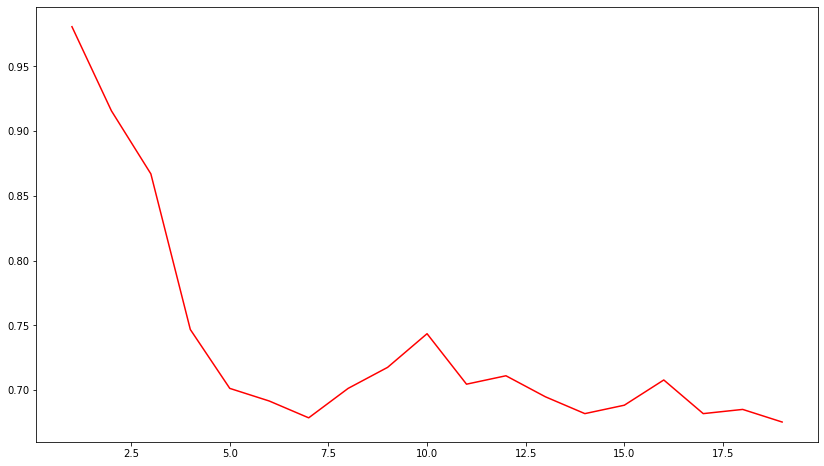

In [ ]:
rcParams['figure.figsize'] = 14, 8
plt.plot([k for k in range(1, 20)], knn_scores, color = 'red')

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#Accuracy, Precision, F1-score, Recall, RocAuc on training Data

X_train_prediction = knn_classifier.predict(X_train)

training_data_accuracyK = accuracy_score(X_train_prediction, y_train)
training_data_precisionK = precision_score(X_train_prediction, y_train)
training_data_f1K = f1_score(X_train_prediction, y_train)
training_data_recallK = recall_score(X_train_prediction, y_train)
training_data_roc_aucK = roc_auc_score(X_train_prediction, y_train)

print("Accuracy on Training Data(LR): ", training_data_accuracyK)
print("Precision on Training Data(LR): ", training_data_precisionK)
print("F1-score on Training Data(LR): ", training_data_f1K)
print("Recall on Training Data(LR): ", training_data_recallK)
print("Roc_Auc Score on Training Data(LR): ", training_data_roc_aucK)

Accuracy on Training Data(LR):  0.9874476987447699
Precision on Training Data(LR):  0.9755434782608695
F1-score on Training Data(LR):  0.9876203576341127
Recall on Training Data(LR):  1.0
Roc_Auc Score on Training Data(LR):  0.9874301675977654


In [ ]:
#Accuracy, Precision, F1-score, Recall, RocAuc on Testing Data

X_test_prediction = knn_classifier.predict(X_test)

testing_data_accuracyK = accuracy_score(X_test_prediction, y_test)
testing_data_precisionK = precision_score(X_test_prediction, y_test)
testing_data_f1K = f1_score(X_test_prediction, y_test)
testing_data_recallK = recall_score(X_test_prediction, y_test)
testing_data_roc_aucK = roc_auc_score(X_test_prediction, y_test)

print("Accuracy on Testing Data(KNN): ", testing_data_accuracyK)
print("Precision on Testing Data(KNN): ", testing_data_precisionK)
print("F1-score on Testing Data(KNN): ", testing_data_f1K)
print("Recall on Testing Data(KNN): ", testing_data_recallK)
print("Roc_Auc Score on Testing Data(KNN): ", testing_data_roc_aucK)

Accuracy on Testing Data(KNN):  0.9155844155844156
Precision on Testing Data(KNN):  0.8544303797468354
F1-score on Testing Data(KNN):  0.9121621621621622
Recall on Testing Data(KNN):  0.9782608695652174
Roc_Auc Score on Testing Data(KNN):  0.9214833759590793


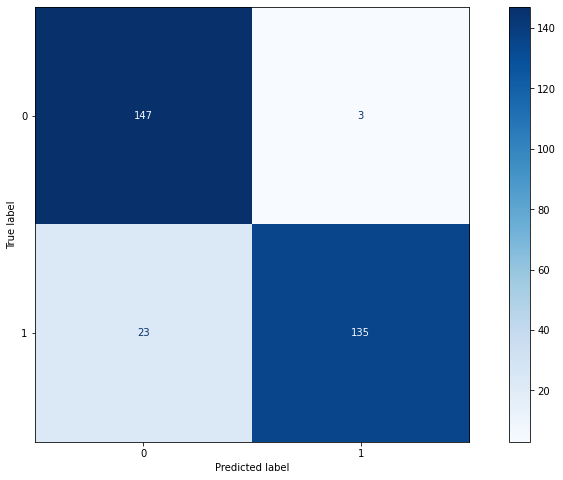

In [ ]:
rcParams['figure.figsize'] = 14, 8
plot_confusion_matrix(knn_classifier, X_test, y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

# Prediction System


In [ ]:
input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)
input_data = np.asarray(input_data)
input_data = input_data.reshape(1, -1)
print(input_data)

NameError: ignored

In [ ]:
predictionLR = LRmodel.predict(input_data)
predictionKNN = knn_classifier.predict(input_data)
predictionSVC = svc_classifier.predict(input_data)

if predictionLR and predictionKNN and predictionSVC == 1:
  print("The person has a heart disease (1)")
else:
  print("The person does not has a heart disease (0)")

The person has a heart disease (1)


In [ ]:
def heartdisease(age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal):

  x = np.array([age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal])
  predictionLR = LRmodel.predict(x.reshape(1, -1))
  predictionKNN = knn_classifier.predict(x.reshape(1, -1))
  predictionSVC = svc_classifier.predict(x.reshape(1, -1))
  yes="The person has a heart disease (1)"
  no="The person does not has a heart disease (0)"
  if predictionLR and predictionKNN and predictionSVC == 1 :
      return yes
  else:

    return no


In [ ]:
!pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gradio as gr

In [ ]:
outputs = gr.outputs.Textbox()

app = gr.Interface(fn=heartdisease, inputs=['number','number','number','number','number','number','number','number','number','number','number','number','number'], outputs=outputs,description="Heart Disease Prediction Application")


In [ ]:
app.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>